#  <font color='#FFE15D'><b> TinyStories</b></font>




# 🔴 **Environment Setup**

## 🟠 Pip Install

In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == 

# 🔴 **Import**

In [3]:
import os
import json
import random
import glob
import psutil
import pickle
from pprint import pprint
from tqdm import tqdm
from collections import Counter, defaultdict

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datasets
from datasets import load_dataset
from tokenizers import Tokenizer, models, trainers, pre_tokenizers, normalizers, decoders, processors

import torch
from torch.utils.data import TensorDataset, Dataset, IterableDataset, DataLoader

In [ ]:
!python --version

Python 3.11.12


In [ ]:
datasets.__version__

'3.5.0'

# 🔴 **Utils**

In [ ]:
def get_sample(dataset):
    # Randomly select an index from the training dataset
    idx = random.randint(0, len(dataset['train']))

    # Return the "text" field of the randomly selected training sample
    return dataset['train'][idx]['text']

# 🔴 **EDA**

## 🟠 Download Dataset

In [ ]:
dataset = load_dataset("roneneldan/TinyStories")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

(…)-00000-of-00004-2d5a1467fff1081b.parquet:   0%|          | 0.00/249M [00:00<?, ?B/s]

(…)-00001-of-00004-5852b56a2bd28fd9.parquet:   0%|          | 0.00/248M [00:00<?, ?B/s]

(…)-00002-of-00004-a26307300439e943.parquet:   0%|          | 0.00/246M [00:00<?, ?B/s]

(…)-00003-of-00004-d243063613e5a057.parquet:   0%|          | 0.00/248M [00:00<?, ?B/s]

(…)-00000-of-00001-869c898b519ad725.parquet:   0%|          | 0.00/9.99M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2119719 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/21990 [00:00<?, ? examples/s]

In [ ]:
print(f"Number of train rows(stories): {dataset['train'].num_rows:,}")
print(f"Number of valid rows(stories): {dataset['validation'].num_rows:,}")

Number of train rows(stories): 2,119,719
Number of valid rows(stories): 21,990


In [ ]:
pprint(dataset['train'][0]['text'])

('One day, a little girl named Lily found a needle in her room. She knew it '
 'was difficult to play with it because it was sharp. Lily wanted to share the '
 'needle with her mom, so she could sew a button on her shirt.\n'
 '\n'
 'Lily went to her mom and said, "Mom, I found this needle. Can you share it '
 'with me and sew my shirt?" Her mom smiled and said, "Yes, Lily, we can share '
 'the needle and fix your shirt."\n'
 '\n'
 "Together, they shared the needle and sewed the button on Lily's shirt. It "
 'was not difficult for them because they were sharing and helping each other. '
 'After they finished, Lily thanked her mom for sharing the needle and fixing '
 'her shirt. They both felt happy because they had shared and worked together.')


## 🟠 Display 3 random stories from the 'train'

In [ ]:
# Display 3 random stories from the 'train'
sample_stories = random.sample(dataset['train']['text'], 3)
for i, story in enumerate(sample_stories, 1):
    print(f"Story {i}:\n{story}\n{'-'*120}")

Story 1:
One day, a little girl named Lucy found a big, flexible stick in her yard. She liked to bend it and watch it move. Lucy thought it was fun to play with. She decided to show her flexible stick to her friend, Tom.

"Look, Tom! I found a flexible stick!" Lucy said. Tom liked the stick too. They played with it all day, making shapes and pictures with the stick. They made a house, a tree, and even a dog! It was so much fun.

At the end of the day, Lucy and Tom made a big picture out of the flexible stick. They put it on the ground and stood back to look at it. It was a picture of a happy sun. They were so proud of their picture.

"Let's show our moms and dads!" Tom said. So they called their parents to come see the picture. When their moms and dads saw the picture, they were very happy. They all clapped their hands and applauded Lucy and Tom.

Lucy and Tom smiled and felt proud of their picture. They knew they had made something special with their flexible stick. From that day on, 

## 🟠 Measuring RAM Usage After Dataset Loading

In [ ]:
# RAM before
process = psutil.Process(os.getpid())
ram_before = process.memory_info().rss  # in bytes

# Load dataset
dataset = load_dataset("roneneldan/TinyStories")

# RAM after
ram_after = process.memory_info().rss

# Result
ram_used = ram_after - ram_before
print(f"🔹 RAM used for loading dataset: {ram_used / (1024**2):.2f} MB")


🔹 RAM used for loading dataset: 136.89 MB


In [ ]:
# RAM before
process = psutil.Process(os.getpid())
ram_before = process.memory_info().rss  # in bytes

# Load full dataset into memory
train = list(dataset["train"])
val = list(dataset["validation"])

# RAM after
ram_after = process.memory_info().rss

# Result
ram_used = ram_after - ram_before
print(f"🔹 RAM used for loading full dataset into memory: {ram_used / (1024**3):.2f} GB")


🔹 RAM used for loading full dataset into memory: 4.14 GB


In [ ]:
# RAM before
process = psutil.Process(os.getpid())
ram_before = process.memory_info().rss  # in bytes

for item in tqdm(dataset["train"], desc="Looping over the dataset {Train}"):
    pass

for item in tqdm(dataset["validation"], desc="Looping over the dataset {Valid}"):
    pass

# RAM after
ram_after = process.memory_info().rss

# Result
ram_used = ram_after - ram_before
print(f"\n🔹 RAM usage while looping over the dataset: {ram_used / (1024**3):.2f} GB")


Looping over the dataset {Valid}: 100%|██████████| 21990/21990 [00:00<00:00, 52496.93it/s]


🔹 RAM usage while looping over the dataset: 1.66 GB


In [5]:
# RAM before
process = psutil.Process(os.getpid())
ram_before = process.memory_info().rss  # in bytes

# Load dataset
dataset = load_dataset("roneneldan/TinyStories", keep_in_memory=True)

# RAM after
ram_after = process.memory_info().rss

# Result
ram_used = ram_after - ram_before
print(f"🔹 RAM used for loading dataset: {ram_used / (1024**3):.2f} GB")

🔹 RAM used for loading dataset: 1.81 GB


## 🟠 Measuring RAM Usage After Tokenization

In [ ]:
tokenizer = Tokenizer.from_pretrained("deepseek-ai/DeepSeek-V3")

In [ ]:
num_tok  = 0
tokenized_train_samples = []
batch_size = 512
token_counts = Counter()
char_counts  = Counter()
len_dataset = len(dataset['train']['text'])

with tqdm(dataset['train'], desc="Processing") as tepoch:
  for story in tepoch:

    char_counts.update(story["text"])
    tokenized = tokenizer.encode(story["text"])
    tokenized_train_samples.append(np.array(tokenized.ids))
    num_tok += len(tokenized.ids)
    token_counts.update(tokenized.ids)

    tepoch.set_postfix(unique_tokens=f"{len(token_counts):,}",
                       total_tokens=f"{num_tok:,}",
                       unique_chars=f"{len(char_counts):,}")

bytes_per_token = 4  # int32:4 | uint16:2
total_size_gb = num_tok * bytes_per_token / (1024**3)
print(f"\n\n🔹 Estimated train token memory: {total_size_gb:.2f} GB")

Processing: 100%|██████████| 2119719/2119719 [2:05:04<00:00, 282.48it/s, total_tokens=451,534,782, unique_chars=174, unique_tokens=31,573]




🔹 Estimated train token memory: 1.68 GB


In [ ]:
num_tok  = 0
tokenized_valid_samples = []
batch_size = 512
token_counts = Counter()
char_counts  = Counter()
len_dataset = len(dataset['validation']['text'])

with tqdm(dataset['validation'], desc="Processing") as tepoch:
  for story in tepoch:

    char_counts.update(story["text"])
    tokenized = tokenizer.encode(story["text"])
    tokenized_valid_samples.append(np.array(tokenized.ids))
    num_tok += len(tokenized.ids)
    token_counts.update(tokenized.ids)

    tepoch.set_postfix(unique_tokens=f"{len(token_counts):,}",
                       total_tokens=f"{num_tok:,}",
                       unique_chars=f"{len(char_counts):,}")

bytes_per_token = 4  # int32:4 | uint16:2
total_size_gb = num_tok * bytes_per_token / (1024**2)
print(f"\n\n🔹 Estimated validation token memory: {total_size_gb:.2f} MB")

Processing: 100%|██████████| 21990/21990 [01:58<00:00, 186.25it/s, total_tokens=4,546,011, unique_chars=101, unique_tokens=12,909]



🔹 Estimated validation token memory: 17.34 MB


### 🟡 Save the tokens for future use

In [ ]:
# Save tokens as a pickle file
with open('tokenized_train_samples.pkl', 'wb') as f:
    pickle.dump(tokenized_train_samples, f)

with open('tokenized_valid_samples.pkl', 'wb') as f:
    pickle.dump(tokenized_valid_samples, f)

In [ ]:
# RAM before
process = psutil.Process(os.getpid())
ram_before = process.memory_info().rss  # in bytes

# Load data from the pickle file
with open('tokenized_train_samples.pkl', 'rb') as f:
    tokenized_train_samples = pickle.load(f)

with open('tokenized_valid_samples.pkl', 'rb') as f:
    tokenized_valid_samples = pickle.load(f)

# RAM after
ram_after = process.memory_info().rss

# Result
ram_used = ram_after - ram_before
print(f"🔹 RAM used for loading full dataset into memory: {ram_used / (1024**3):.2f} GB")

🔹 RAM used for loading full dataset into memory: 4.35 GB


In [ ]:
train_bytes = sum(arr.nbytes for arr in tokenized_train_samples)
valid_bytes = sum(arr.nbytes for arr in tokenized_valid_samples)

print(f"🔹 Train data size (bytes): {train_bytes / 1024 ** 3:.2f} GB")
print(f"🔹 Valid data size (bytes): {valid_bytes / 1024 ** 2:.2f} MB")

🔹 Train data size (bytes): 3.36 GB
🔹 Valid data size (bytes): 34.68 MB


### 🟡 Save the unique tokens and count character

In [ ]:
df_count_ch = pd.DataFrame.from_dict(char_counts, orient='index', columns=['count'])
df_unique_tokens = pd.DataFrame.from_dict(token_counts, orient='index', columns=['count'])

In [ ]:
df_count_ch

,count
O,3416440
n,88723326
e,180782399
,362117598
d,81365133
...,...
î,1
á,14
É,2
Ò,1


In [ ]:
df_count_ch.to_csv("count_ch_train.csv", index=False)
df_unique_tokens.to_csv("unique_tokens_train.csv", index=False)

In [13]:
df_count_ch = pd.read_csv("count_ch_train.csv")

In [ ]:
df_count_ch[df_count_ch['count']==1]

,count
|,1
Ñ,1
ƒ,1
µ,1
®,1
î,1
Ò,1


## 🟠 Distribution of Token Counts per Story

In [ ]:
# Counting tokens per sample
token_counts = []
for tokens in tqdm(tokenized_train_samples, desc="Counting tokens per sample"):
    token_counts.append(len(tokens))

Counting tokens per sample: 100%|██████████| 2119719/2119719 [00:01<00:00, 1352262.90it/s]


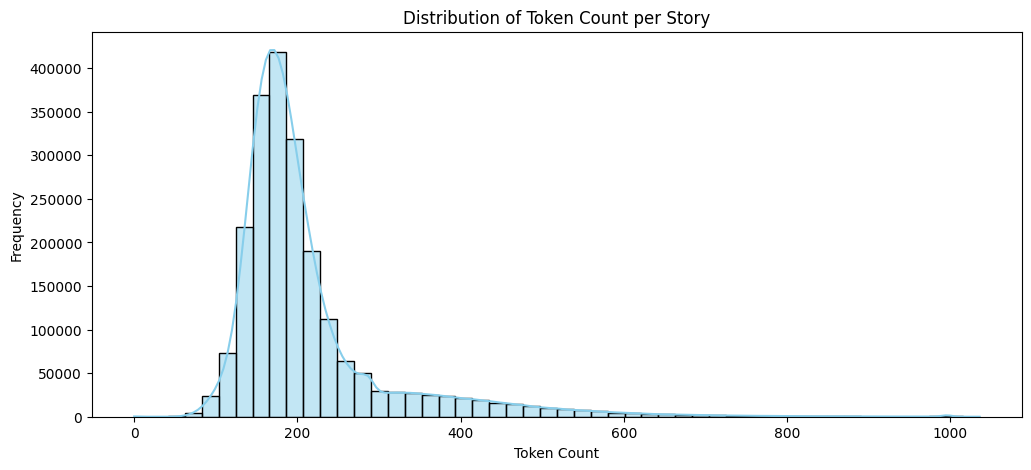

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(token_counts, kde=True, bins=50, color='skyblue')
plt.title("Distribution of Token Count per Story")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.show()

### 🟡 Distribution of training and validation sets

⛔️ **Warning:** Ensure that the distributions of the training and validation sets are similar.

In [ ]:
# Counting tokens per sample
token_counts_val = []
for tokens in tqdm(tokenized_valid_samples, desc="Counting tokens per sample"):
    token_counts_val.append(len(tokens))

Counting tokens per sample: 100%|██████████| 21990/21990 [00:00<00:00, 1750080.55it/s]


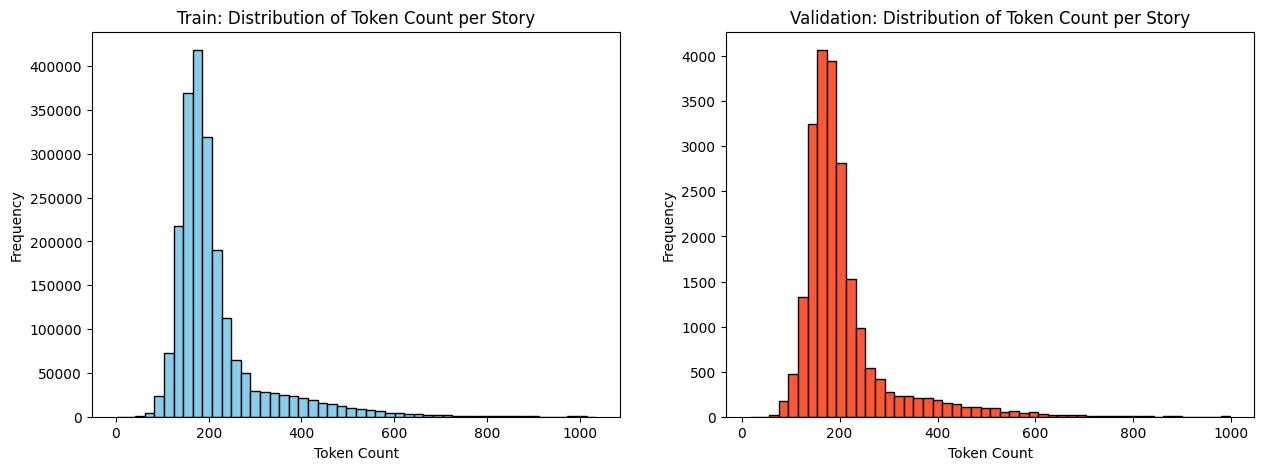

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(token_counts, bins=50, color='skyblue', edgecolor='black');
axes[0].set_title('Train: Distribution of Token Count per Story');
axes[0].set_xlabel('Token Count');
axes[0].set_ylabel('Frequency');

axes[1].hist(token_counts_val, bins=50, color='#FF5733', edgecolor='black');
axes[1].set_title('Validation: Distribution of Token Count per Story');
axes[1].set_xlabel('Token Count');
axes[1].set_ylabel('Frequency');

## 🟠 Analyzing Short Stories

In [ ]:
unique_length = np.unique(token_counts)
print(unique_length[:10])

[ 0  6  9 11 12 13 14 15 18 19]


In [ ]:
# Get unique lengths
target_lengths = unique_length[:10]

# Track how many samples we've printed per length
samples_per_length = defaultdict(int)
max_samples = 5  # max samples per token length

for idx, tokens in enumerate(tokenized_train_samples):
    token_len = len(tokens)

    if token_len in target_lengths and samples_per_length[token_len] < max_samples:
        count = samples_per_length[token_len] + 1
        print(f"\n📘 Length: {token_len}")
        pprint(dataset["train"][idx]["text"])
        samples_per_length[token_len] += 1

    # Stop if we've collected all 10 * 5 = 50 samples
    if sum(samples_per_length.values()) >= len(target_lengths) * max_samples:
        break



📘 Length: 0
''

📘 Length: 0
''

📘 Length: 0
''

📘 Length: 0
''

📘 Length: 0
''

📘 Length: 11
'One day a lady entered the room. She was mod'

📘 Length: 6
'Once upon a time, there'

📘 Length: 12
'Once upon a time, there was a silly little bunny'

📘 Length: 9
'Once upon a time, in a quiet little'

📘 Length: 18
'Once upon a time, in a big tree, there was a thoughtful raven. The'

📘 Length: 13
'Once upon a time, there was a boy named Timmy.'

📘 Length: 19
('Once upon a time, there was a little girl named Lily who loved fairies. She '
 'would')

📘 Length: 15
'Once upon a time, there was a little girl named Helga. Hel'

📘 Length: 12
'Once upon a time, there was a silly little bunny'

📘 Length: 12
'Once upon a time, in a wide, hot desert,'

📘 Length: 14
'Once upon a time, there was a happy baby named Jack. Jack'

📘 Length: 15
'Once upon a time, a chubby cat named Kitty lived in a'


## 🟠 Most common unigrams, bigrams, trigrams

In [ ]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.util import ngrams

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Helper functions
def clean_text(text):
    text = text.lower()
    return text.strip()

def get_top_ngrams(ngrams_list, n=20):
    counter = Counter(ngrams_list)
    return counter.most_common(n)

In [ ]:
# Preprocessing and aggregation
all_words = []
all_bigrams = []
all_trigrams = []

for sample in tqdm(dataset['validation']):  # Limit for performance (you can increase)
    text = clean_text(sample['text'])
    words = word_tokenize(text)
    all_words.extend(words)
    all_bigrams.extend([' '.join(bg) for bg in ngrams(words, 2)])
    all_trigrams.extend([' '.join(tg) for tg in ngrams(words, 3)])

100%|██████████| 21990/21990 [00:51<00:00, 423.54it/s]


In [ ]:
top_unigrams = get_top_ngrams(all_words)
top_bigrams = get_top_ngrams(all_bigrams)
top_trigrams = get_top_ngrams(all_trigrams)

print("\n🔸 Top 20 Unigrams:")
print(top_unigrams)

print("\n🔸 Top 20 Bigrams:")
print(top_bigrams)

print("\n🔸 Top 20 Trigrams:")
print(top_trigrams)


🔸 Top 20 Unigrams:
[('.', 358849), ('the', 204873), ('and', 181817), (',', 174211), ('to', 129273), ('a', 117121), ('was', 99492), ('he', 81788), ('she', 78131), ('it', 71460), ('they', 64992), ('her', 51001), ("''", 46793), ('``', 46777), ('said', 35139), ('!', 33317), ('his', 33039), ('in', 32774), ('with', 31619), ('lily', 30740)]

🔸 Top 20 Bigrams:
[('. she', 43541), ('. he', 42399), ('. they', 38209), ('. the', 29535), (', ``', 22586), ('was a', 20609), ('. ``', 19850), ('in the', 18923), ('it was', 17512), ('said ,', 17236), ('day ,', 16767), ('one day', 16107), ('. it', 15527), ('to the', 15483), (". ''", 15241), ('there was', 15234), ('. one', 14500), ("! ''", 14025), ('upon a', 13605), ('a time', 13579)]

🔸 Top 20 Trigrams:
[('said , ``', 15326), ('there was a', 14402), ('one day ,', 14009), ('. one day', 13633), ('once upon a', 13545), ('upon a time', 13536), ('a time ,', 10655), (', there was', 10240), ('time , there', 10039), ('and said ,', 7637), ('. it was', 7169), ('was

## 🟠 Extracting the Top 10,000 Most Frequent Tokens from the Dataset

In [ ]:
# Counter to keep track of token frequencies
token_counter = Counter()

# Iterate through all token IDs and update the counter
for tokens in tqdm(tokenized_train_samples, desc="Counting token frequencies"):
    token_counter.update(tokens)

# Get the 10,000 most frequent tokens
top_10k_tokens = [token_id for token_id, _ in token_counter.most_common(10_000)]

# Save to file for future use
with open("top_10k_tokens.txt", "w") as f:
    for token_id in top_10k_tokens:
        f.write(f"{token_id}\n")

print("\n🔹 10K top tokens saved to top_10k_tokens.txt")


Counting token frequencies: 100%|██████████| 2119719/2119719 [02:01<00:00, 17441.04it/s]


🔹 10K top tokens saved to top_10k_tokens.txt


In [ ]:
print(f"🔹 Unique tokens: {len(token_counter)}")

🔹 Unique tokens: 31573


### 🟡 Print rare tokens

In [ ]:
from rich.console import Console
from rich.text import Text

In [ ]:
tokens = tokenizer.encode('text hi').ids
tokens

[2067, 19346]

In [ ]:
# Initialize rich console for colored output
console = Console()

# Load tokenizer and dataset
tokenizer = Tokenizer.from_pretrained("deepseek-ai/DeepSeek-V3")

# Load list of allowed tokens (top 10k)
with open("top_10k_tokens.txt", "r") as f:
    top_10k_tokens = set(int(line.strip()) for line in f)

# Select a random story from the dataset
sample = random.choice(dataset['train'])
text = sample["text"]

# Tokenize the text without special tokens
tokens = tokenizer.encode(text).ids

# Build styled text using rich
styled_text = Text()
for token_id in tokens:
    token_str = tokenizer.decode([token_id])

    if token_id in top_10k_tokens:
        styled_text.append(token_str, style="white")
    else:
        styled_text.append(token_str, style="bold yellow")

# Print both the original and the color-highlighted version
console.rule("🔍 Tokenized View (unk tokens in yellow)")
console.print(styled_text)


──────────────────────────────────── 🔍 Tokenized View (unk tokens in yellow) ─────────────────────────────────────

Once upon a time there was a family who had a very large furniture.

The parents decided to talk to the 3 year old daughter to explain why it was important to value the furniture.

"Value means you must take care of your toys," said mom.
"And the furniture too?" asked the daughter.
"Yes, the furniture too!" said dad.

The daughter was so happy and she promised to take good care of the furniture. She always made sure to clean it and
not play too rough.

The family was so proud of their daughter for understanding the importance of valuing their furniture.

## 🟠 Vocabulary richness (type-token ratio)

In [ ]:
# Calculate Type-Token Ratio (TTR)
type_token_ratio = len(token_counter) / sum(token_counter.values())
print(f"🔹 Vocabulary Richness (TTR): {type_token_ratio:.4f}")

🔹 Vocabulary Richness (TTR): 0.0001
